Connecting boazmohar@mesoscale-activity.datajoint.io:3306


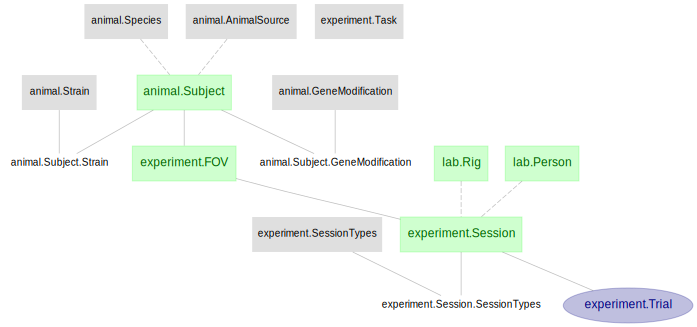

In [1]:
%matplotlib inline
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
import getpass
dj.config['database.user'] = 'boazmohar'
dj.config['database.password'] = 'rodent-research'
dj.conn()
import experiment
import lab
import animal
# 
dj.ERD(animal) + dj.ERD(lab) + dj.ERD(experiment)

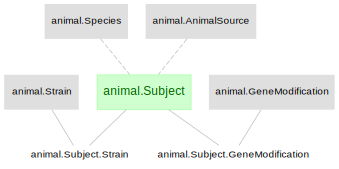

In [3]:
dj.ERD(animal) 

In [6]:
def dropdbs():
    print('dropping databases: \n\n')
    for d in ['animal', 'experiment', 'lab', 'subjects']:
        try:
            schema = dj.schema('boazmohar_%s' % d, locals())
            schema.drop(force=True)
            print('dropping {d}'.format(d=d))
        except Exception as e:
            print('error dropping {d}: {e}'
                 .format(d=d, e=str(e)))
dropdbs()

dropping databases: 


dropping animal
dropping experiment
dropping lab
dropping subjects


In [2]:
from animal import *
s = Subject()
s.insert1((394215, 'mus musculus', 70, '2017-02-05', '2017-07-14', 'M', 'jax'))
s.insert1((394220, 'mus musculus', 71, '2017-02-05', '2017-07-14', 'F', 'jax'))
s.insert1((394219, 'mus musculus', 72, '2017-02-05', '2017-07-26', 'F', 'jax'))
s.insert1((397353, 'mus musculus', 73, '2017-06-06', '2017-08-24', 'M', 'jax'))
s.insert1((397354, 'mus musculus', 74, '2017-06-06', '2017-08-24', 'M', 'jax'))
s.insert1((397357, 'mus musculus', 75, '2017-06-06', '2017-09-17', 'F', 'jax'))
s.insert1((388614, 'mus musculus', 76, '2017-04-15', '2017-09-29', 'M', 'jax'))
strains = Subject.Strain()
strains.insert1((394215,'wt'))
strains.insert1((394220,'wt'))
strains.insert1((394219,'wt'))
strains.insert1((397353,'wt'))
strains.insert1((397354,'wt'))
strains.insert1((397357,'wt'))
strains.insert1((388614,'Chrna2 OE25'))
lab.Rig().insert1(('2p_spine','Two Photopn high NA'))
lab.Person().insert1(('boazmohar', 'Boaz Mohar'))

In [3]:
experiment.FOV().insert1((394219, 1, '2018-01-06', 'First'))

In [4]:
experiment.FOV()

subject_id institution animal ID,fov_id,stack_date when it was imaged for reference,description location in the craniotomy
394219,1,2018-01-06,First


In [17]:
experiment.Session().insert1((394219, 1, 1, '2018-01-06', 1, 'boazmohar','2p_spine'))

In [7]:
experiment.Session()

subject_id institution animal ID,fov_id,run,date,username,rig


In [10]:
lab.Person()

username,fullname
boazmohar,Boaz Mohar
